In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Ignore a specific warning
warnings.filterwarnings("ignore")

In [20]:
#Reading the data of strategy 1
S1_df = pd.read_csv("./S1_trades.csv")
S1_df["buytime"] = pd.to_datetime(S1_df["buytime"])

In [34]:
#Reading the data of strategy 2
S2_df = pd.read_csv("./S2_trades.csv")
S2_df["buytime"] = pd.to_datetime(S2_df["buytime"])

### Checking if the data is clean

<Axes: >

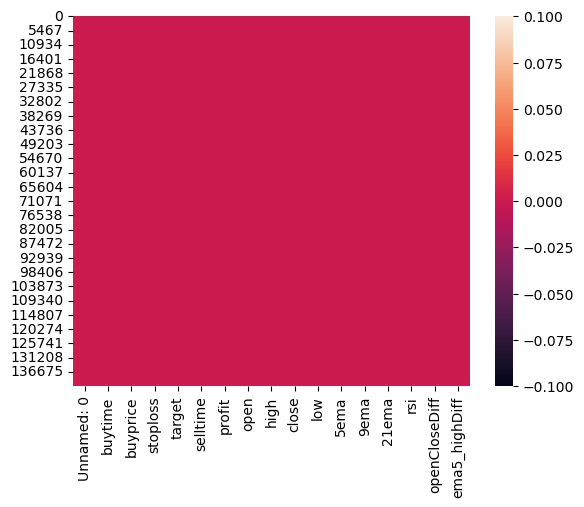

In [4]:
#Checking if any data is missing
sns.heatmap(S1_df.isnull())

#### There are no null values

In [32]:
S1_df.head()


,Unnamed: 0,buytime,buyprice,stoploss,target,selltime,profit,open,high,close,low,5ema,9ema,21ema,rsi,openCloseDiff,ema5_highDiff
0,1,2020-02-03 04:45:00,11139.55,11036.25,12689.05,05-03-2020 22:45,-0.927327,11050.30,11139.55,11139.50,11036.25,11150.922630,11199.791230,11275.966930,29.382915,0.800754,0.101988
1,2,2020-03-16 00:05:00,9409.60,9339.25,10464.85,16-03-2020 04:35,-0.747641,9341.55,9409.60,9397.65,9339.25,9476.545299,9587.218023,9733.096661,29.547664,0.596958,0.706431
2,3,2020-03-30 00:00:00,8482.85,8378.95,10041.35,30-03-2020 03:35,-1.224824,8399.15,8482.85,8482.25,8378.95,8488.085204,8535.373995,8602.104856,37.374525,0.979693,0.061677
3,4,2022-01-24 22:50:00,16967.90,16840.75,18875.15,14-02-2022 04:35,-0.749356,16858.70,16967.90,16948.10,16840.75,17011.592310,17049.464500,17093.482860,37.162441,0.527493,0.256838
4,5,2020-02-03 04:45:00,9181.05,9105.00,10321.80,05-03-2020 22:45,-0.828337,9116.40,9181.05,9181.05,9105.00,9193.645818,9233.788214,9296.443620,27.369673,0.704168,0.137006


In [35]:
S2_df.head()

,Unnamed: 0,buytime,buyprice,stoploss,target,selltime,profit,open,high,close,low,5ema,9ema,21ema,rsi,openCloseDiff,ema5_highDiff,ema5_lowDiff
0,1,2020-04-16 23:45:00,9267.65,9324.00,8816.85,19-04-2020 23:45,-0.608029,9323.45,9324.00,9270.25,9267.65,9093.244150,9057.858588,9031.391227,83.363659,0.570604,2.474859,1.881878
1,2,2020-12-05 23:45:00,9436.45,9584.50,8252.05,29-05-2020 05:35,-1.568916,9584.20,9584.50,9444.90,9436.45,9281.692869,9246.177559,9199.619553,82.520831,1.453434,3.159342,1.639993
2,3,2019-01-31 22:55:00,8292.20,8342.70,7888.20,31-01-2019 23:50,-0.609006,8339.10,8342.70,8293.95,8292.20,8282.011285,8257.723354,8216.467497,71.358583,0.541425,0.727447,0.122871
3,4,2020-04-16 23:45:00,5520.30,5586.65,4989.50,17-04-2020 01:45,-1.201927,5586.40,5586.65,5532.10,5520.30,5445.379175,5424.244188,5400.354406,82.290403,0.972003,2.528722,1.357188
4,5,2020-12-05 23:45:00,5951.15,6033.95,5288.75,28-05-2020 01:30,-1.391328,6014.20,6033.95,5959.95,5951.15,5793.140457,5753.175689,5703.668616,87.835572,0.902032,3.990910,2.655109


### This function will calculate daily profit 

In [14]:
def calulateProfitArr(profitArr):
    p = 0
    temp = []
    for i in profitArr:
        p = p+i
        temp.append(p)
    return temp

def calculateMonthlyProfit(time,profit):
    monthDict = {}
    for t,p in zip(time,profit):
        s = str(t.month)+"-"+str(t.year)
        if(s in monthDict):
            monthDict[s] = monthDict[s]+p
        else:
            monthDict[s] = p
    return monthDict

In [22]:
nifty_50 = pd.read_csv("./nifty50.csv")
nifty_50["timestamp"] = pd.to_datetime(nifty_50["timestamp"])

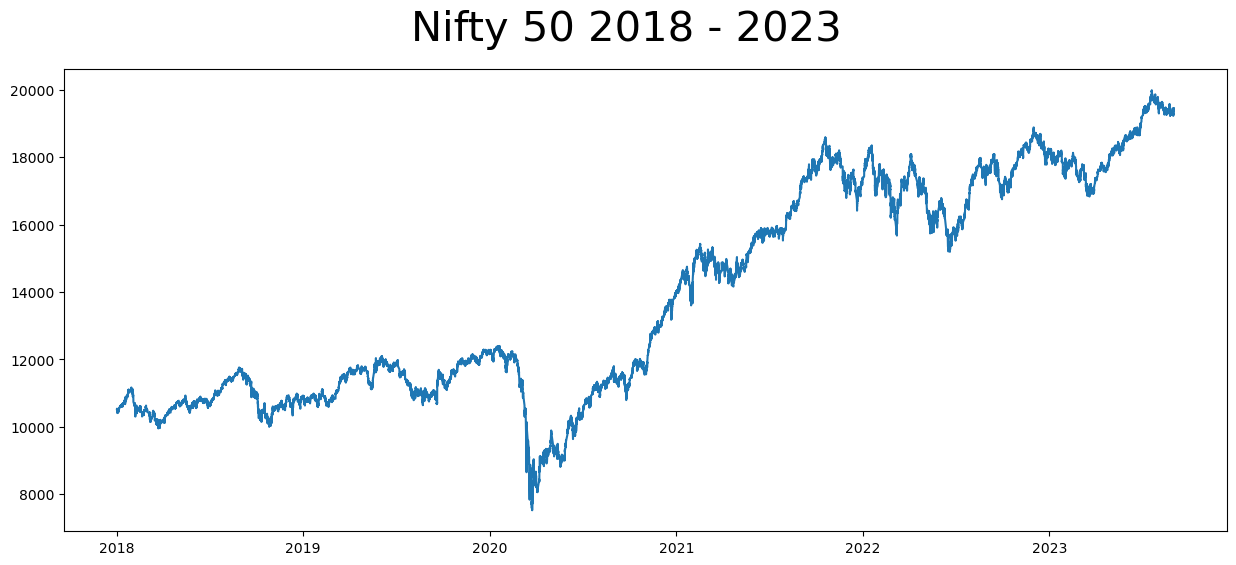

In [23]:
#Visualizing NIFTY 50 with respect to time.
fig, ax = plt.subplots(figsize=(15, 6))
fig.suptitle('Nifty 50 2018 - 2023', fontsize=30)
ax.plot(nifty_50["timestamp"],nifty_50["close"])

#### The plot above represents the market condition over 5 years of time

#### Now we will make an analysis on both of the strategy.

Text(0.5, 1.0, 'Monthly Profit')

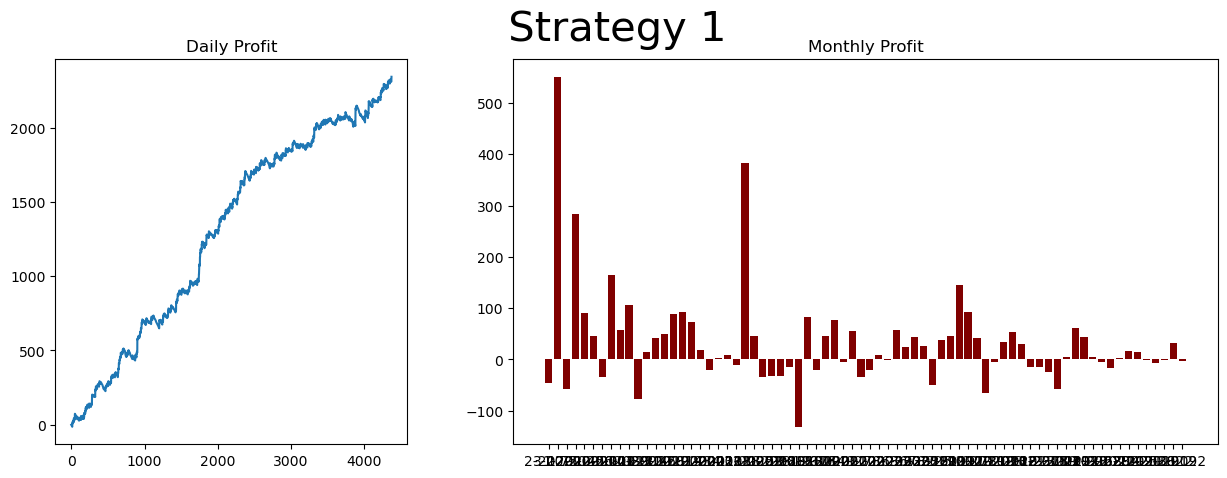

In [36]:
fig, ax = plt.subplots(1, 2,figsize=(15,5), gridspec_kw={"width_ratios": [2, 4]})
fig.suptitle(' Strategy 1 ', fontsize=30)
profit = calulateProfitArr(S1_df["profit"])
ax[0].plot(profit)
ax[0].set_title("Daily Profit")
monthDict = calculateMonthlyProfit(S1_df["buytime"],S1_df["profit"])
ax[1].bar(list(monthDict.keys()), list(monthDict.values()), color ='maroon')
ax[1].set_title("Monthly Profit")

Text(0.5, 1.0, 'Monthly Profit')

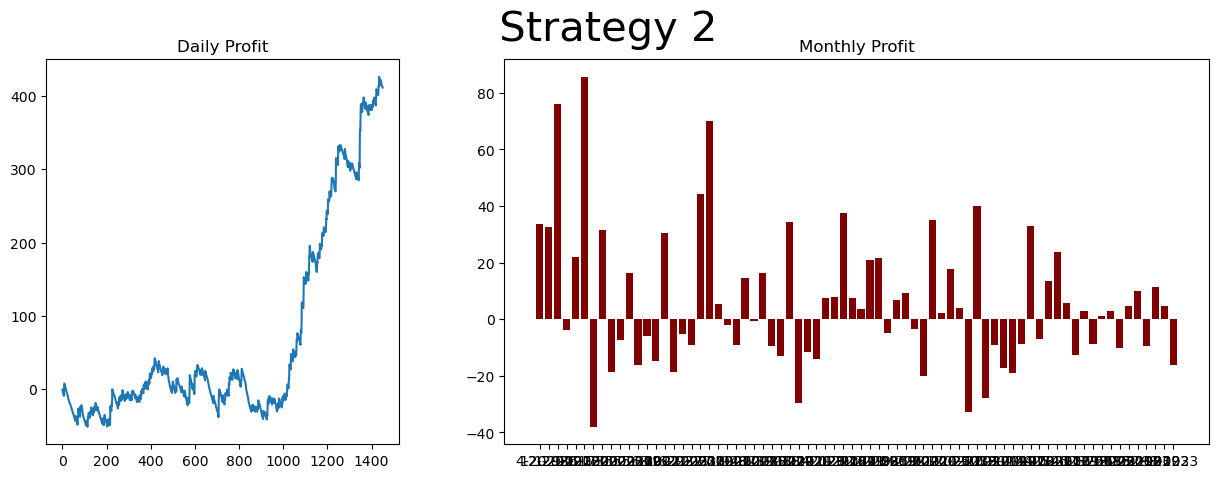

In [38]:
fig, ax = plt.subplots(1, 2,figsize=(15,5), gridspec_kw={"width_ratios": [2, 4]})
fig.suptitle(' Strategy 2 ', fontsize=30)
profit = calulateProfitArr(S2_df["profit"])
ax[0].plot(profit)
ax[0].set_title("Daily Profit")
monthDict = calculateMonthlyProfit(S2_df["buytime"],S2_df["profit"])
ax[1].bar(list(monthDict.keys()), list(monthDict.values()), color ='maroon')
ax[1].set_title("Monthly Profit")

# We have visualized the data of both the strategies. Now we will calculate the volatality of the strategy for risk analysis

The simplest approach to determine the volatility of a security is to calculate the standard deviation of its prices over a period of time.

The standard deviation is a measure of the amount of variation or dispersion in a set of values. In the context of financial data or investment returns, a high standard deviation is often associated with higher volatility.

In [40]:
#For better understanding, calculate volatality of last 3 years only
volatalityList = []
assetsList = [S1_df,S2_df]
t = ["S1_df","S2_df"]
for asset,n in zip(assetsList,t):
    assetList = asset["close"].tolist()
    mean = np.mean(assetList)
    sqdiff = []
    for i in assetList:
        temp = i - mean
        sqdiff.append(temp**2)
    suma = np.sum(sqdiff)
    variance = suma/len(assetList)
    sd = variance**(1/2)
    volatalityList.append(sd)
    print(n,"--->",sd)
    

S1_df ---> 2664.3971768019874
S2_df ---> 2096.280837281289


Strategy 1:  2664.39
--
The standard deviation of 2664.39 indicates the historical volatility of returns for the strategy 1 dataset. It suggests that Strategy 1 returns have experienced high volatility over the given time period.

Strategy 2:  2096.280
--
The standard deviation of 2096.280 indicates the historical volatility of returns for the strategy 2 dataset. It suggests that Strategy 2 returns have experienced high volatility over the given time period. But less that Strategy 1

# 

#### We will create a new dataset using the above 3 datasets of SGB, where we will calculate the weights of the assets to be invested depending on the investors risk 

# PORTFOLIO STATISTICS

In [59]:
SG = pd.concat([S1_df['profit'], S2_df['profit']], axis = 1)
SG.columns = ['Strategy 1', 'Strategy 1']
SG.head()

,Strategy 1,Strategy 1
0,-0.927327,-0.608029
1,-0.747641,-1.568916
2,-1.224824,-0.609006
3,-0.749356,-1.201927
4,-0.828337,-1.391328


#### Calculate daily returns mean

In [60]:
SG.pct_change(1).mean()

Strategy 1   -1.534073
Strategy 1   -0.406313
dtype: float64

#### Calculate correlation between assets

<Axes: >

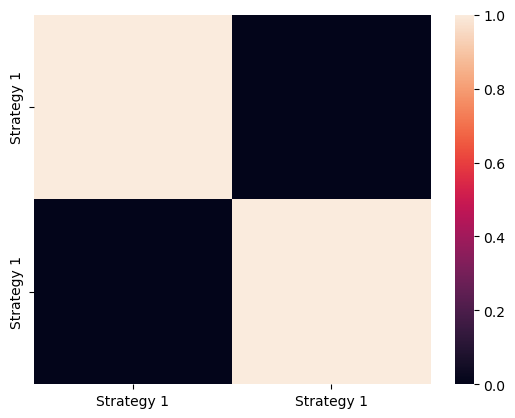

In [61]:
sns.heatmap(SG.pct_change(1).corr())

#### As we can see the assets are very less correlated with each other.

#### Calculating log return of assets for covariance

#### A histogram is a graphical representation of the distribution of a dataset. It's a way to visualize the underlying frequency distribution of a set of continuous or discrete data.

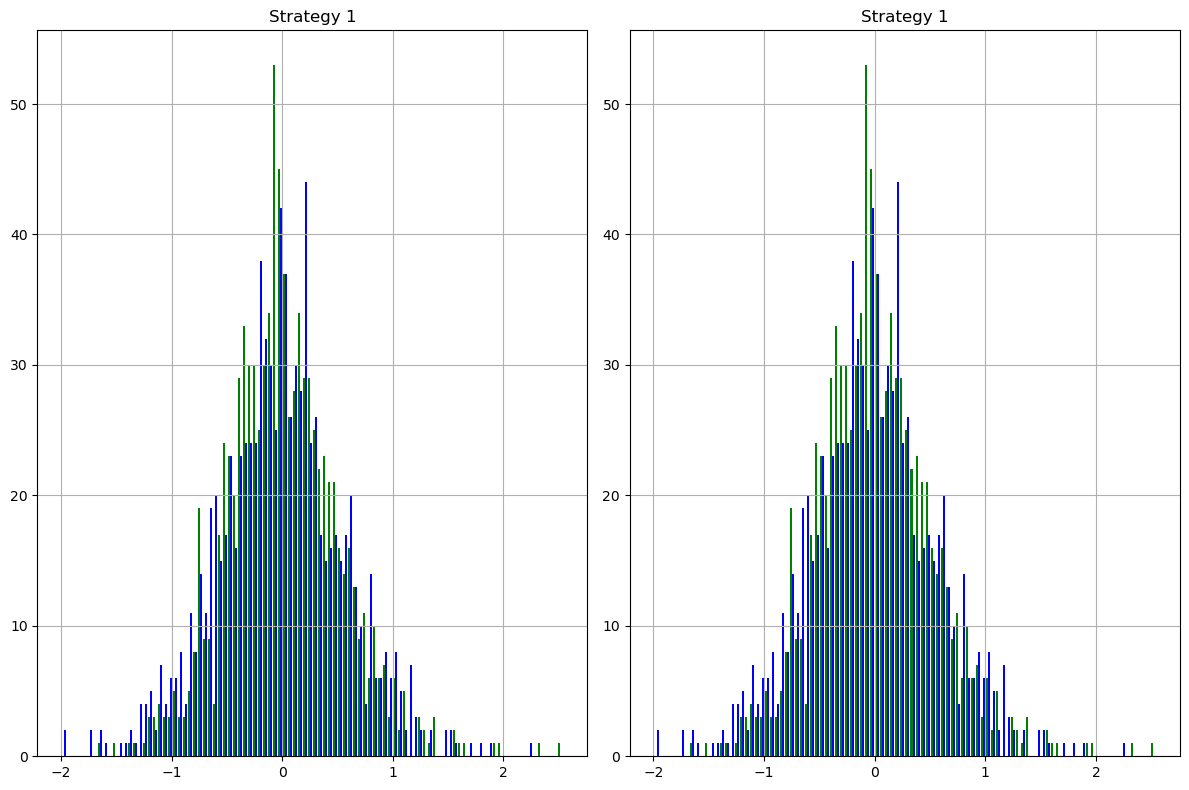

In [65]:
log_returns = np.log(SG/SG.shift(1))
log_returns.hist(bins = 100, figsize = (12,8), color=['g', 'b'])
plt.tight_layout()

#### Covarience of the columns:

In [66]:
log_returns.cov()*252

,Strategy 1,Strategy 1
Strategy 1,87.084525,0.041551
Strategy 1,0.041551,84.826408


#### Calculating random weights for portfolio

In [68]:
np.random.seed()
print(SG.columns)

weights = np.array(np.random.random(2))

print('Random Weights: ')
print(weights)

#However, their sum must be equal to 100
print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['Strategy 1', 'Strategy 1'], dtype='object')
Random Weights: 
[0.88374282 0.03435118]
Rebalance
[0.96258424 0.03741576]


In [69]:
exp_ret = np.sum((log_returns.mean() * weights) * 252)
print('Expected Portfolio Return: ',exp_ret)

Expected Portfolio Return:  -0.1541811451711252


In [70]:
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
print('Expected Volatility: ', exp_vol)

Expected Volatility:  8.989522577730025


In [71]:
SR = exp_ret/exp_vol
print('Sharpe Ratio: ', SR)

Sharpe Ratio:  -0.017151205065448316


#### Now we will create a dataset with the above information. Dataset will have weights of the assets, volatality of the portfolio and the sharpe ratio as the independent variables and the portfolio return as the dependent variable

In [72]:
num_ports = 5000
all_weights = np.zeros((num_ports,len(SG.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
S1 = [];S2 = []

for ind in range(num_ports):
    weights = np.array(np.random.random(2))
    weights = weights / np.sum(weights)
    S1.append(weights[0])
    S2.append(weights[1])
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_returns.mean() * weights) *252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
finalDataset = pd.DataFrame()
finalDataset["Strategy1"] = S1
finalDataset["Strategy2"] = S2
finalDataset["Voltality"] = vol_arr
finalDataset["SharpeRatio"] = sharpe_arr
finalDataset["Returns"] = ret_arr

In [73]:
finalDataset.head()

,Strategy1,Strategy2,Voltality,SharpeRatio,Returns
0,0.493364,0.506636,6.556759,-0.379111,-2.485743
1,0.675300,0.324700,6.976720,-0.226711,-1.581701
2,0.890549,0.109451,8.371917,-0.061172,-0.512127
3,0.278097,0.721903,7.138517,-0.498060,-3.555407
4,0.666112,0.333888,6.936492,-0.234607,-1.627352


<Axes: >

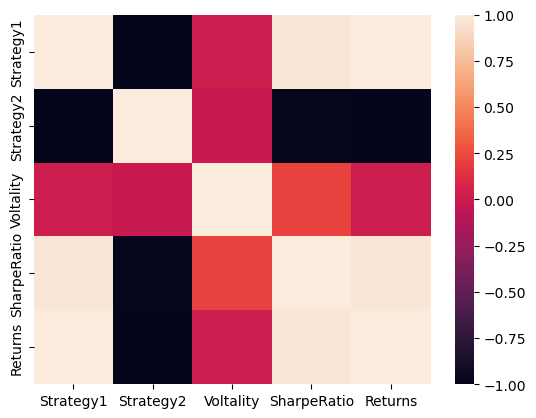

In [74]:
sns.heatmap(finalDataset.corr())

#### Correlation between the categories are good.

In [75]:
sharpe_arr.max()

0.0032015182927659426

In [76]:
all_weights[sharpe_arr.argmax(),:]

array([9.99623049e-01, 3.76950894e-04])

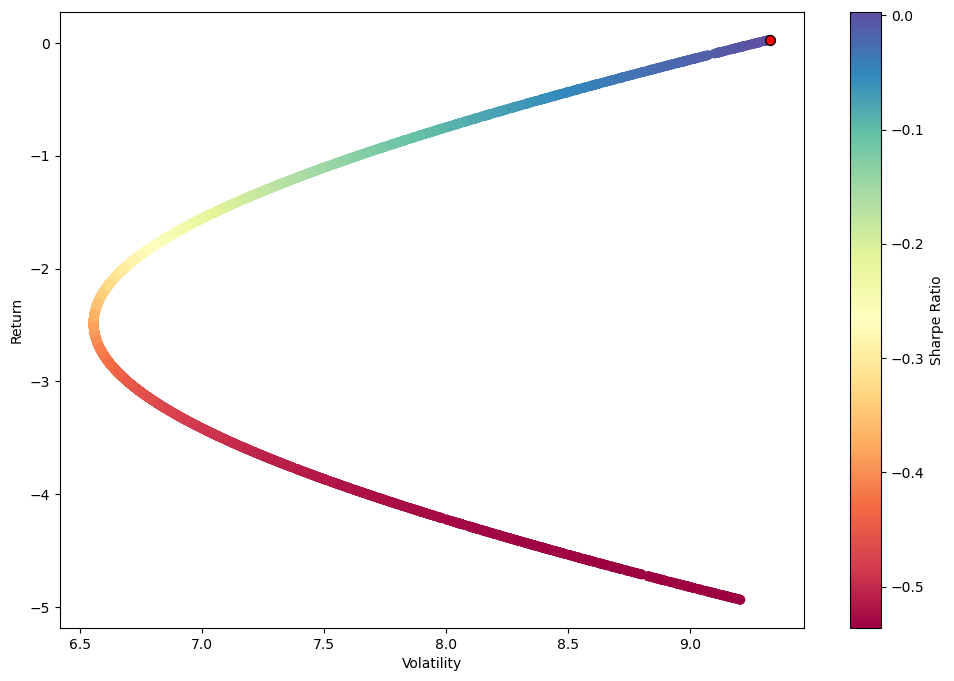

In [77]:
plt.figure(figsize = (12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='Spectral')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black');

#### This plot indicates that as the volatality increases, The sharpe ratio and return decreases

Text(0.5, 1.0, 'Sharpe Ratio vs Portfolio Returns')

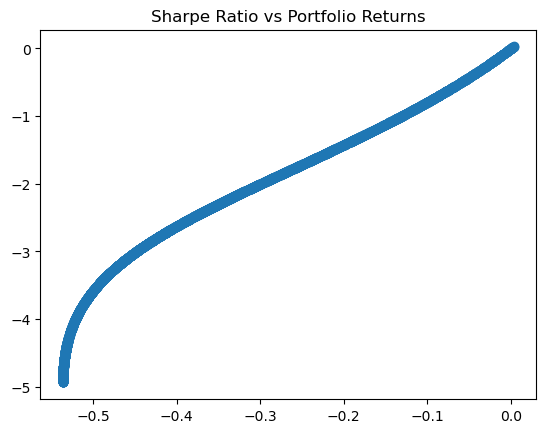

In [78]:
plt.scatter(finalDataset["SharpeRatio"],finalDataset["Returns"])
plt.title("Sharpe Ratio vs Portfolio Returns")

In [79]:
#Error function (cost function). To minimze the error function we need to vary the values
#of m(slope of the linear regression line) and b (y intercept).
# We are using gradient descent to perform linear regression
def error_function(m,b,L,x_train,y_train):
    pd_m = 0
    pd_b = 0
    for i in range(0,len(x_train)):
        x = x_train[i]
        y = y_train[i]
        #Calculating partial derivative wrt m and b individually
        pd_m = pd_m + (-2/len(x_train))*(x*(y -(m*x+b)))
        pd_b = pd_b + (-2/len(x_train))*(y -(m*x+b))
        
    new_m = m-(L*pd_m)
    new_b = b-(L*pd_b)
    return new_m,new_b

In [80]:
def MSE(m,b, X, y):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (y[i] - (m * X[i] + b)) ** 2
    return total_cost / float(len(X))

In [81]:
#Split training and testing data using sklearn model selection.
X_train,X_test,y_train,y_test = train_test_split(finalDataset['SharpeRatio'],finalDataset['Returns'],test_size=0.2, random_state=101)

In [82]:
# Training Set
m = 0
b = 0
L = 0.004
epoch = 20000

mse_training = []
mse_testing = []
for i in range(0,epoch):
    m,b = error_function(m,b,L,X_train.tolist(),y_train.tolist())
    mse_training.append(MSE(m,b,X_train.tolist(),y_train.tolist()))
    mse_testing.append(MSE(m,b,X_test.tolist(),y_test.tolist()))

Text(0, 0.5, 'MSE')

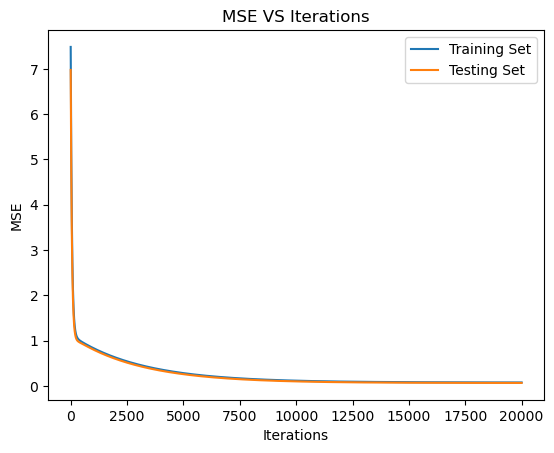

In [83]:
# figure, axis = plt.subplots(2,1,figsize=(10, 10))
plt.plot(mse_training,label="Training Set")
plt.plot(mse_testing,label="Testing Set")
plt.legend()
plt.title("MSE VS Iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE")


#### MSE is constant after 20000 iterations

Text(0.5, 1.0, 'Testing data vs Prediction')

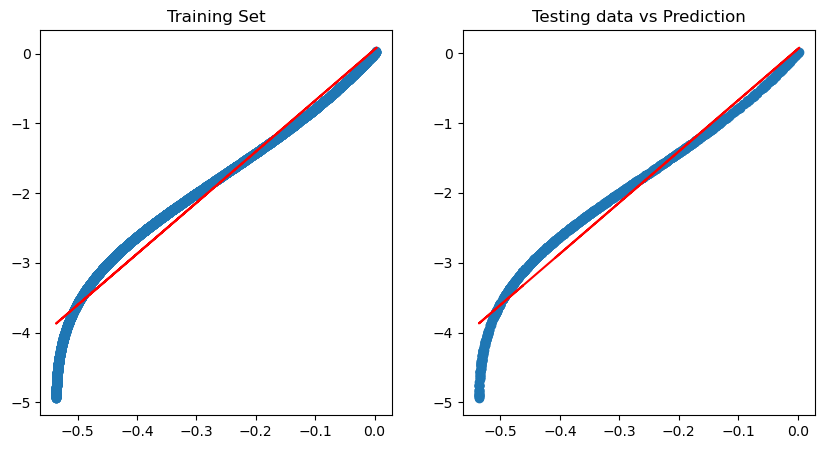

In [84]:
linear_regression2 = []
X_trainList = X_train.tolist()
for i in range(0,len(X_train)):
    linear_regression2.append(m*X_trainList[i] + b)
# print(linear_regression)
figure, axis = plt.subplots(1,2,figsize=(10, 5))
axis[0].scatter(X_trainList,y_train.tolist())
axis[0].plot(X_trainList,linear_regression2,color = "red")
axis[0].set_title("Training Set")


y_test_pred = []
X_testList = X_test.tolist()
for i in range(0,len(X_testList)):
    y_test_pred.append(m*X_testList[i] + b)
# print(linear_regression)
axis[1].scatter(X_testList,y_test.tolist())
axis[1].plot(X_testList,y_test_pred,color = "red")
axis[1].set_title("Testing data vs Prediction")

In [85]:
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.18
Mean squared error = 0.06
Median absolute error = 0.14
Explain variance score = 0.95
R2 score = 0.95
